# ***Yulu : A buisness Case study ***




Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## ***Problem Statement ***

1.   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2.   How well those variables describe the electric cycle demands



### Lets start with importing the neccesary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency


### Basic Data Exploratory Analysis

In [ ]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Missing Values detection **

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.isnull().sum(axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Check for Duplicates **

In [ ]:
df[df.duplicated() == True]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


Good to Note that Dataset consists of 10886 rows and 12 columns with No null data and no duplicates

### **Some Statistical Analysis**

In [ ]:
df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [ ]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
df['season'].value_counts(ascending = True)

1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64

In [ ]:
df['weather'].value_counts(ascending = True)

4       1
3     859
2    2834
1    7192
Name: weather, dtype: int64

### Lets see some Uni- Variate & Bi-variate analysis and view some trends

<Axes: xlabel='season', ylabel='count'>

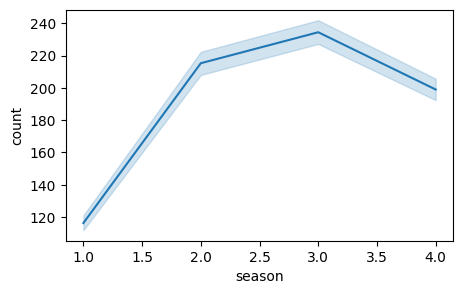

In [ ]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=df, x='season', y='count', estimator=np.mean)

<Axes: xlabel='season', ylabel='count'>

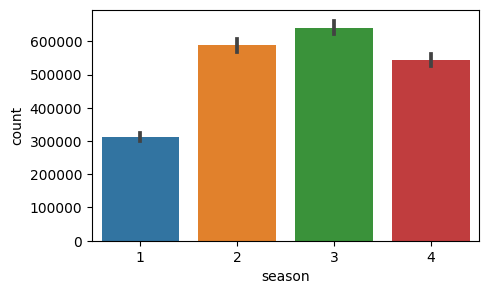

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='season', y='count', estimator=np.sum)

<Axes: xlabel='season', ylabel='casual'>

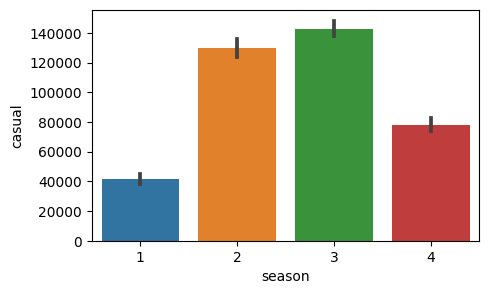

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='season', y='casual', estimator=np.sum)

<Axes: xlabel='season', ylabel='registered'>

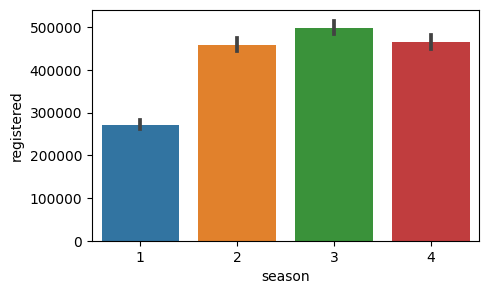

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='season', y='registered', estimator=np.sum)

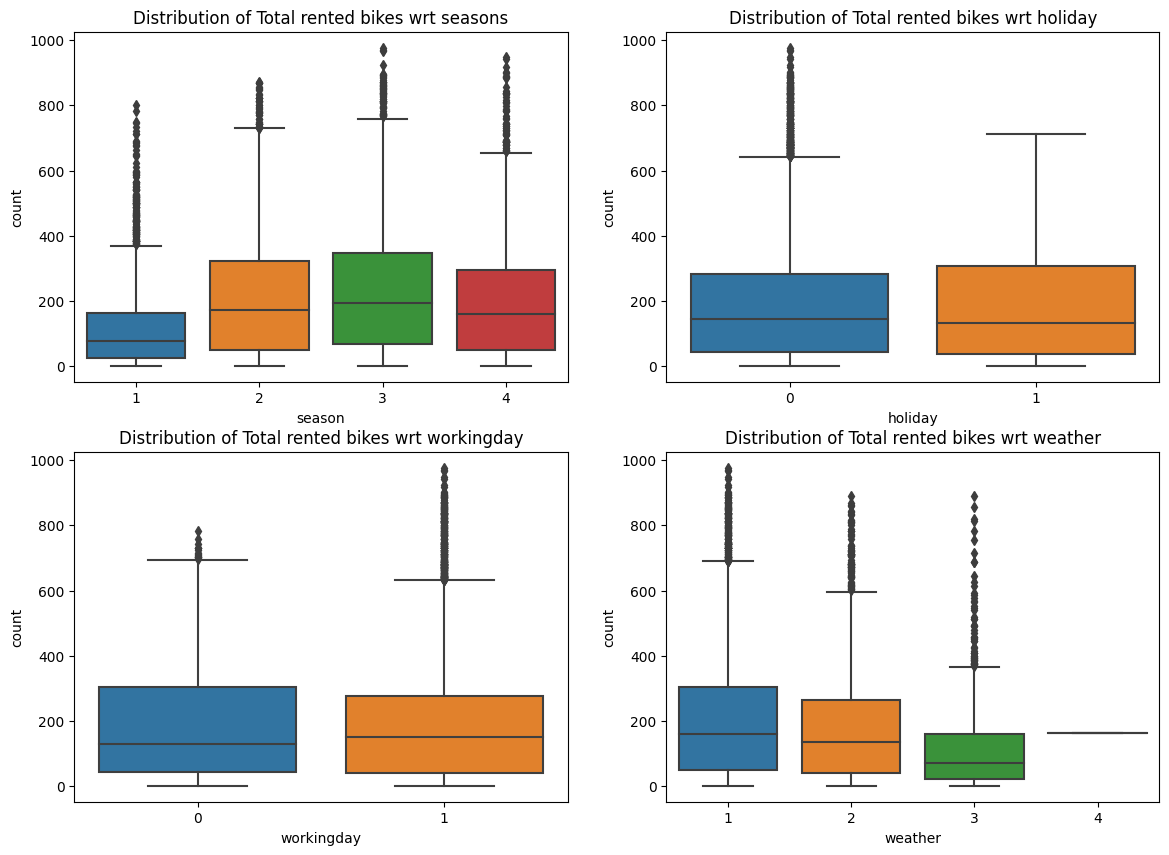

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
plt.title('Distribution of Total rented bikes wrt seasons')
sns.boxplot(x = df['season'], y = df['count'])
plt.subplot(2,2,2)
plt.title('Distribution of Total rented bikes wrt holiday')
sns.boxplot(x = df['holiday'], y = df['count'])
plt.subplot(2,2,3)
plt.title('Distribution of Total rented bikes wrt workingday')
sns.boxplot(x = df['workingday'], y = df['count'])
plt.subplot(2,2,4)
plt.title('Distribution of Total rented bikes wrt weather')
sns.boxplot(x = df['weather'], y = df['count'])
plt.show()

As we can see from above analysis working day  vs the total number of rental bikes we see that the median of the working day is more than that of non working day but is this change significant we need to test the hypothesis of this hence since one side we have categorical data and other is numeric we use the t-test for this testing.

**Test to check if Working Day has effect on number of electric cycles rented**

Lets Set up the test

 H0 ; Working Day has no effect on electric cycles rented ( mu1 = mu2)

 Ha ; Working Day has an effect on electric cycles rented (mu1 != mu2)



In [ ]:
df[df['workingday'] == 0]['count'].mean()

188.50662061024755

In [ ]:
df[df['workingday'] == 1]['count'].mean()

193.01187263896384

As we can see mu1 != mu2 But is this change significant ?

Lets find out

In [ ]:
working_day_0 = df[df['workingday'] == 0]['count']
working_day_1 = df[df['workingday'] == 1]['count']


In [ ]:
t_stat, p_value = ttest_ind(working_day_0, working_day_1)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.22644804226361348
Fail to reject H0


Since from above Hypothesis test we can confirm that since the p-value is so much greater than 0.05 we ca conclude that working days has no relation with the total number of electric bikes rented.

**Test to check if No. of cycles rented similar or different in different seasons / Weather**

Now from the bivariate analysis we can see that the medians are not similar hence we need to test the significance of these wrt to the different seasons & weather now since seasons and weathers have more than one category we use the ANOVA test

Before Using ANOVA test we need to check the prerequisites of the data


1.   Data Should follow normal distribuition
2.   Equal variances in each group



**Test for Gaussian **

Lets see how the Total number of electric bikes sold data looks like

<Axes: xlabel='count', ylabel='Count'>

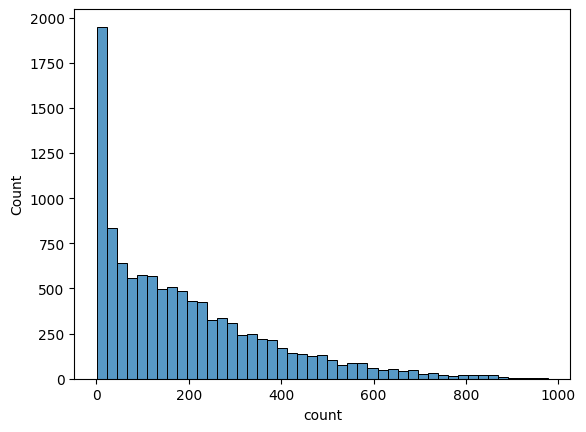

In [ ]:
df_totalbikes = df['count']
sns.histplot(df_totalbikes)

As we can see above the distribution of data for column count which displays the total number of electric bikes rented does not look like normally distributed lets confirm via qqplot

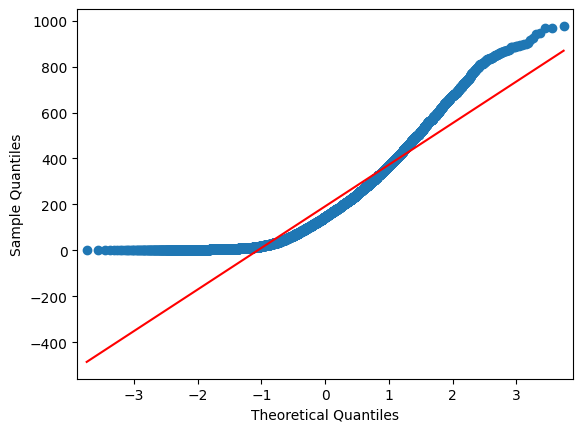

In [ ]:
qqplot(df_totalbikes , line = 's')
plt.show()

We can clearly see that it deviates from the qqplot line which follows the normal curve lets see if this is significant using shapiro test

In [ ]:
#H0 : Data is Gaussian
#Ha : Data is not Gaussian
df_totalbikes_sample = df_totalbikes.sample(100)
test_stat, p_value = shapiro(df_totalbikes_sample)
print(p_value)

1.9908117110389867e-07


From the Above test we are confirmed that the data is not gaussian hence it will be logical if we used Kruskall wallis test to test the significance of the tests.

**Test to check if No. of cycles rented similar or different in different seasons**

In [ ]:
season_1 = df[df['season'] == 1]['count']
season_2 = df[df['season'] == 2]['count']
season_3 = df[df['season'] == 3]['count']
season_4 = df[df['season'] == 4]['count']

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

k_statistic, p_value = kruskal(season_1, season_2, season_3, season_4)

if p_value < 0.05:
    print("Reject H0")
    print(p_value)
else:
    print("Fail to reject H0")
    print("All groups have same mean")
    print(p_value)

Reject H0
2.479008372608633e-151


Hence we can see from the result of the test the difference in the means was significant hence we can coclude that the total number of bikes rented has an effect when the seasons change

**Test to check if No. of cycles rented similar or different in different weather**

In [ ]:
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

k_statistic, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)

if p_value < 0.05:
    print("Reject H0")
    print(p_value)
else:
    print("Fail to reject H0")
    print("All groups have same mean")
    print(p_value)

Reject H0
3.501611300708679e-44


Hence we can see from the result of the test the difference in the means was significant hence we can coclude that the total number of bikes rented has an effect when the weathers change

**Test for is Weather is dependent on season**

Since we need to check it weather and season are dependent or independant to each other we need to check using an appropiate test since both the fields are categorical we use the Chi Square test

In [ ]:
cross_data = pd.crosstab(index = df['weather'], columns = df['season'])
cross_data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
# H0: weather does not impact the seasonal change
# Ha: weather impacts seasonal change

chi_stat, p_value, df, exp_value = chi2_contingency(cross_data)
print(chi_stat)
print(p_value)
print(df)
print(exp_value)
if p_value < 0.05:
  print("Reject H0")
  print("weather impacts seasonal change")
else:
  print('weather does not impact the seasonal change')

49.15865559689363
1.5499250736864862e-07
9
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject H0
weather impacts seasonal change


From the test we can conclude that the weather has an effect of seasonal changes

# **Conclusion**


Yulu's revenue decline is influenced by seasonal and weather factors, not working days. Marketing during high-demand seasons, adjusting operations based on weather, and educating users can optimize electric cycle usage. Analyzing granular data and collaborating with local events can provide deeper insights and drive demand. Strategic adjustments aligned with these factors will enhance Yulu's micro-mobility services in the Indian market, fostering sustainability and profitability.